In [3]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler

In [6]:
api_key = 'I92EXE4UX0377113'

    # American Airlines stock market prices
ticker = "SPY"

    # JSON file with all the stock market data for AAL from the last 20 years
url_string = "https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=%s&outputsize=full&apikey=%s"%(ticker,api_key)

    # Save data to this file
file_to_save = '%s.csv'%ticker

    # If you haven't already saved data,
    # Go ahead and grab the data from the url
    # And store date, low, high, volume, close, open values to a Pandas DataFrame
if not os.path.exists(file_to_save):
    with urllib.request.urlopen(url_string) as url:
        data = json.loads(url.read().decode())
            # extract stock market data
        data = data['Time Series (Daily)']
        df = pd.DataFrame(columns=['Date','Low','High','Close','Open'])
        for k,v in data.items():
            date = dt.datetime.strptime(k, '%Y-%m-%d')
            data_row = [date.date(),float(v['3. low']),float(v['2. high']),
                            float(v['4. close']),float(v['1. open'])]
            df.loc[-1,:] = data_row
            df.index = df.index + 1
    print('Data saved to : %s'%file_to_save)        
    df.to_csv(file_to_save)

Data saved to : SPY.csv


In [7]:
df.to_csv("stock_market_data-SPY.csv")
df = df.sort_values('Date')

# Double check the result
df.head()

,Date,Low,High,Close,Open
0,1999-11-01,135.562,137,135.562,136.5
1,1999-11-02,134.594,137.25,134.594,135.969
2,1999-11-03,135.125,136.375,135.5,136
3,1999-11-04,135.766,137.359,136.531,136.75
4,1999-11-05,136.781,139.109,137.875,138.625


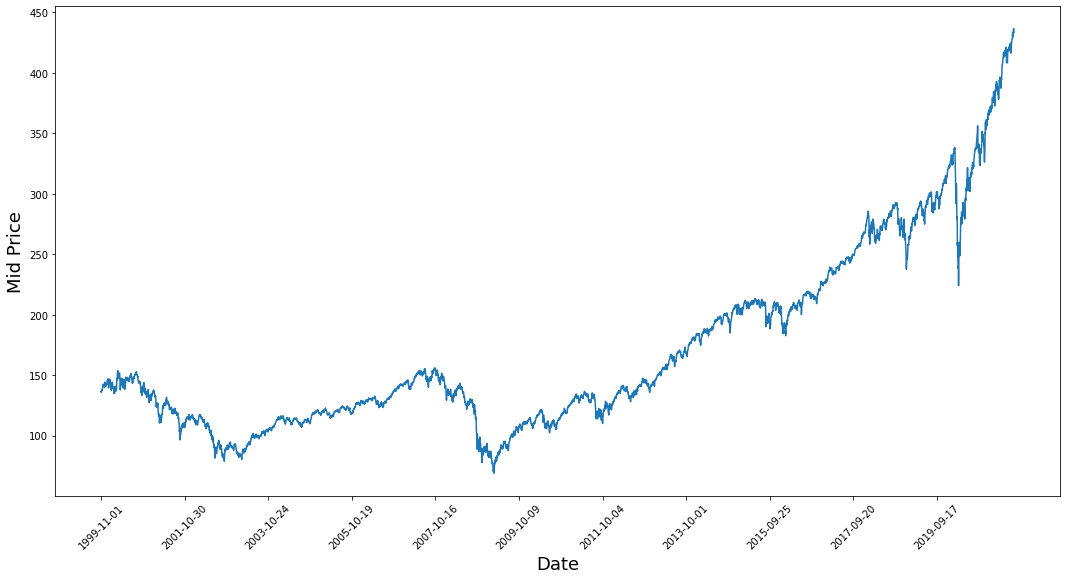

In [8]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),(df['Low']+df['High'])/2.0)
plt.xticks(range(0,df.shape[0],500),df['Date'].loc[::500],rotation=45)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Mid Price',fontsize=18)
plt.show()

In [9]:
 #First calculate the mid prices from the highest and lowest
high_prices = df.loc[:,'High'].to_numpy()
low_prices = df.loc[:,'Low'].to_numpy()
mid_prices = (high_prices+low_prices)/2.0

In [15]:
train_data = mid_prices[:5000]
test_data = mid_prices[5000:]

In [16]:
scaler = MinMaxScaler()
train_data = train_data.reshape(-1,1)
test_data = test_data.reshape(-1,1)

In [17]:
smoothing_window_size = 2000
for di in range(0,4000,smoothing_window_size):
    scaler.fit(train_data[di:di+smoothing_window_size,:])
  

In [18]:
train_data = train_data.reshape(-1)

# Normalize test data
test_data = scaler.transform(test_data).reshape(-1)

In [19]:
EMA = 0.0
gamma = 0.1
for ti in range(5000):
    EMA = gamma*train_data[ti] + (1-gamma)*EMA
    train_data[ti] = EMA
all_mid_data = np.concatenate([train_data,test_data],axis=0)

In [20]:
window_size = 100
N = train_data.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime(k, '%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = df.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(train_data[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-train_data[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for standard averaging: 26.25149


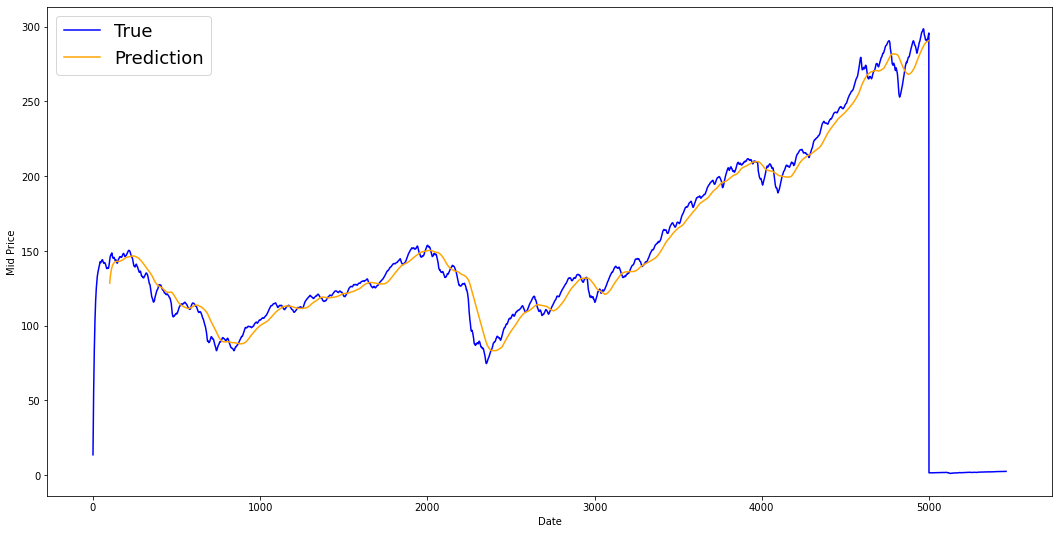

In [21]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [24]:
window_size = 100
N = _data.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*train_data[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-train_data[pred_idx])**2)
    run_avg_x.append(date)

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))

MSE error for EMA averaging: 3.85995


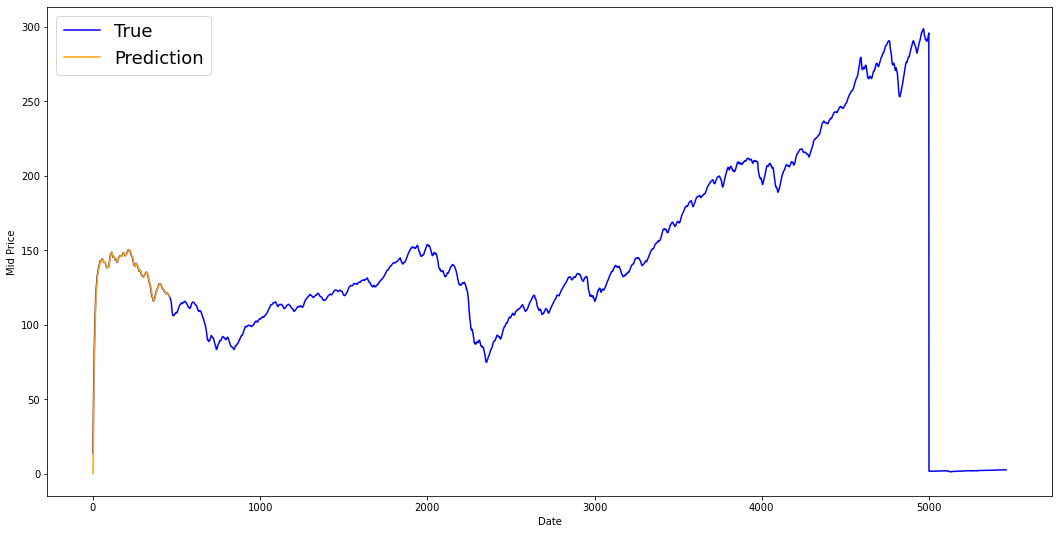

In [25]:
plt.figure(figsize = (18,9))
plt.plot(range(df.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()

In [28]:
!pip install -U quandl  fbprophet  pytrends pystan

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\hp\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-install-665w2rq3\\fbprophet_e044d33e2fae4d75908686e9f0db8e9d\\setup.py'"'"'; __file__='"'"'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-install-665w2rq3\\fbprophet_e044d33e2fae4d75908686e9f0db8e9d\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\hp\AppData\Local\Temp\pip-wheel-4k99u1e7'
       cwd: C:\Users\hp\AppData\Local\Temp\pip-install-665w2rq3\fbprophet_e044d33e2fae4d75908686e9f0db8e9d\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbproph

  Using cached PyMeeus-0.5.11.tar.gz (5.4 MB)
  Using cached korean_lunar_calendar-0.2.1-py3-none-any.whl (8.0 kB)
  Using cached hijri_converter-2.1.3-py3-none-any.whl (14 kB)
  Using cached ephem-4.0.0.2-cp38-cp38-win_amd64.whl (808 kB)
  Running setup.py clean for fbprophet
  Created wheel for pymeeus: filename=PyMeeus-0.5.11-py3-none-any.whl size=730976 sha256=77dfe485a8ace225951b40c158be15fe4930269337416c7c5a58740d4a468d9b
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\a0\8b\b2\810ae5a6f970c8be4725353400d643c90de1c0f023a9884ee7
Successfully built pymeeus
Failed to build fbprophet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Using cached Quandl-3.6.1-py2.py3-none-any.whl (26 kB)
  Using cached fbprophet-0.7.1.tar.gz (64 kB)
  Using cached pytrends-4.7.3-py3-none-any.whl (14 kB)
  Using cached pystan-3.2.0-py3-none-any.whl (13 kB)
  Using cached inflection-0

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\hp\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-install-r8dtkh9_\\fbprophet_1957df79e7774a9e91b82d26bdc38204\\setup.py'"'"'; __file__='"'"'C:\\Users\\hp\\AppData\\Local\\Temp\\pip-install-r8dtkh9_\\fbprophet_1957df79e7774a9e91b82d26bdc38204\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\hp\AppData\Local\Temp\pip-wheel-6uam070c'
       cwd: C:\Users\hp\AppData\Local\Temp\pip-install-r8dtkh9_\fbprophet_1957df79e7774a9e91b82d26bdc38204\
  Complete output (44 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib
  creating build\lib\fbproph

In [27]:
from stocker import Stocker

ModuleNotFoundError: No module named 'stocker'

In [ ]:
from stocker import Stocker